In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [2]:
medical_data = pd.read_csv('dataset/insurance.csv')

In [3]:
medical_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
medical_data.shape

(1338, 7)

In [5]:
medical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
medical_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


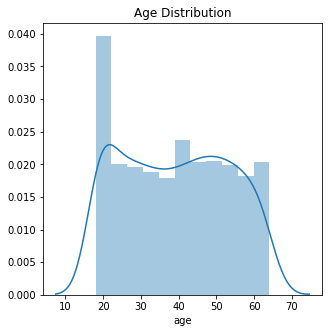

In [8]:
plt.figure(figsize=(5,5))
sns.distplot(medical_data['age'])
plt.title('Age Distribution')
plt.show()

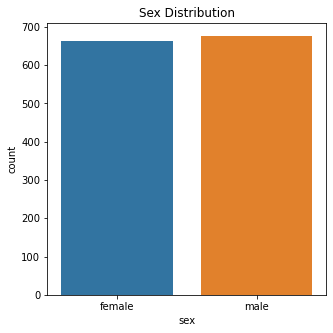

In [9]:
plt.figure(figsize=(5,5))
sns.countplot(x='sex', data=medical_data)
plt.title('Sex Distribution')
plt.show()

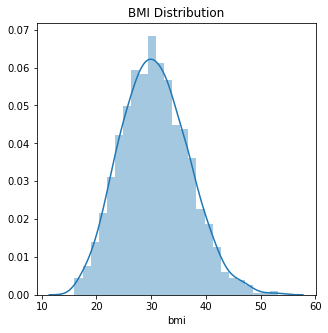

In [10]:
plt.figure(figsize=(5,5))
sns.distplot(medical_data['bmi'])
plt.title('BMI Distribution')
plt.show()



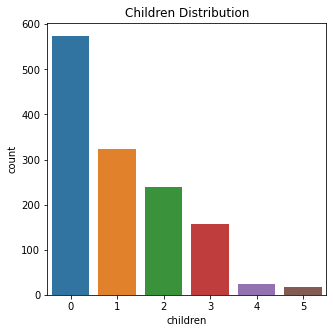

In [11]:
plt.figure(figsize=(5,5))
sns.countplot(x='children', data=medical_data)
plt.title('Children Distribution')
plt.show()

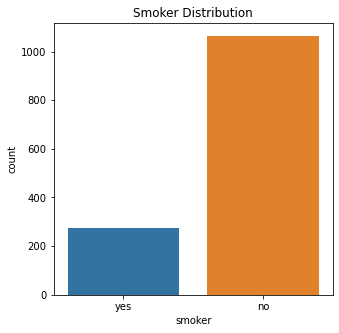

In [12]:
plt.figure(figsize=(5,5))
sns.countplot(x='smoker', data=medical_data)
plt.title('Smoker Distribution')
plt.show()

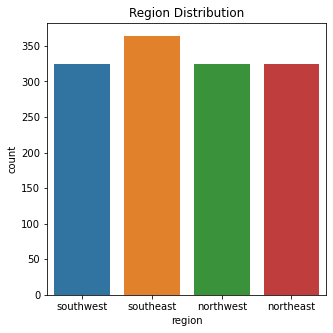

In [13]:
plt.figure(figsize=(5,5))
sns.countplot(x='region', data=medical_data)
plt.title('Region Distribution')
plt.show()

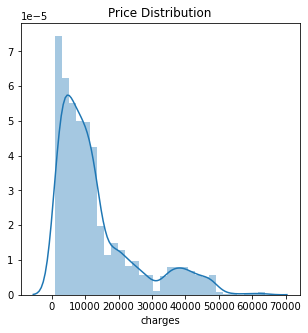

In [15]:
plt.figure(figsize=(5,5))
sns.distplot(medical_data['charges'])
plt.title('Price Distribution')
plt.show()


In [16]:
#Now We will encode the categorical data to be able to train the model

medical_data.replace({'sex':{'male':0, 'female':1}, 'smoker':{'yes':0, 'no':1}, 'region':{'southeast':0, 'southwest':1, 'northeast':2, 'northwest':3}}, inplace=True)

In [17]:
medical_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


In [18]:
x = medical_data.drop(columns=['charges'], axis=1)
y = medical_data['charges']

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=24)

In [29]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [30]:
training_pred = model.predict(x_train)
testing_pred = model.predict(x_test)

re_train = metrics.r2_score(y_train, training_pred)
re_test = metrics.r2_score(y_test, testing_pred)

print('R^2 Error (Training): ', re_train)
print('R^2 Error (Testing): ', re_test)

R^2 Error (Training):  0.7433483019848852
R^2 Error (Testing):  0.7756363619527071


In [34]:
#Predictive System:

input_data = (31, 1, 27.78, 0, 1, 0)

input_np = np.asarray(input_data)
input_reshaped = input_np.reshape(1, -1)

prediction = model.predict(input_reshaped)
print('The cost of the medical insurance is: $', prediction)

The cost of the medical insurance is: $ [4526.13150765]
